<a href="https://colab.research.google.com/github/Ishita95-harvad/Road-Accident-Data-Analysis---End-to-End-ML-Workflow/blob/main/Business_Analytics_Qlik_Road_Safety_and_Accident_Patterns_in_India_ipyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **🚦 Road Accident Data Analysis - End-to-End ML Workflow**

**"Technological advancement in transportation has minimized the distances but increased the risks to life. With this project, we aim to uncover data-driven insights to promote safer travel through analytics and visualization."**

**📌 Step 1: Data Extraction**

In [ ]:
from google.colab import files
import pandas as pd
import io
import zipfile

# Upload your file (the zip file containing RA2019_A24.csv)
uploaded = files.upload()

# Get the filename and file content from the uploaded dictionary
filename = list(uploaded.keys())[0]
file_content = uploaded[filename]

# Open the zip file and read the CSV
try:
    with zipfile.ZipFile(io.BytesIO(file_content)) as z:
        # Open the CSV file within the zip
        with z.open('RA2019_A24.csv') as f:
            # Read the CSV data into a pandas DataFrame
            df = pd.read_csv(f)
            print(df.head())
except zipfile.BadZipFile:
    print("Uploaded file is not a valid zip file.")
except KeyError:
    print("CSV file 'RA2019_A24.csv' not found in the zip archive.")

Saving archive (10).zip to archive (10) (5).zip
          States/UTs  Traffic Light Signal - Total number of Accidents  \
0     Andhra Pradesh                                              1197   
1  Arunachal Pradesh                                                 0   
2              Assam                                               107   
3              Bihar                                                 0   
4       Chhattisgarh                                               167   

   Traffic Light Signal - Persons Killed  \
0                                    329   
1                                      0   
2                                     31   
3                                      0   
4                                     24   

   Traffic Light Signal - Persons Injured - Greviously Injured  \
0                                                484             
1                                                  0             
2                                           

**🧹 Step 2: Preprocessing**

In [ ]:
# Clean column names
df.columns = df.columns.str.strip()

# Drop rows with missing States
df.dropna(subset=['States/UTs'], inplace=True)

# Fill missing values with 0
df.fillna(0, inplace=True)

# Convert columns to numeric
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Rename for clarity
df.rename(columns={
    'States/UTs': 'State',
    'Traffic Light Signal - Total number of Accidents': 'Traffic_Accidents',
    'Traffic Light Signal - Persons Killed': 'Traffic_Killed',
    'Police Controlled - Total number of Accidents': 'Police_Accidents',
    'Police Controlled - Persons Killed': 'Police_Killed',
    'Others - Total number of Accidents': 'Others_Accidents',
    'Others - Persons Killed': 'Others_Killed',
    'Uncontrolled - Persons Killed - Number': 'Uncontrolled_Killed'
}, inplace=True)

df.head()


,State,Traffic_Accidents,Traffic_Killed,Traffic Light Signal - Persons Injured - Greviously Injured,Traffic Light Signal - Persons Injured - Minor Injury,Traffic Light Signal - Persons Injured - Total Injured,Police_Accidents,Police_Killed,Police Controlled - Persons Injured - Greviously Injured,Police Controlled - Persons Injured - Minor Injury,...,Uncontrolled_Killed,Uncontrolled - Persons Killed - Rank,Uncontrolled - Persons Injured - Greviously Injured,Uncontrolled - Persons Injured - Minor Injury,Uncontrolled - Persons Injured - Total Injured,Others_Accidents,Others_Killed,Others - Persons Injured - Greviously Injured,Others - Persons Injured - Minor Injury,Others - Persons Injured - Total Injured
0,Andhra Pradesh,1197,329,484,694,1178,847,222,260,509,...,1699,6.0,1256,3198,4454,14445,5328,3940,13338,17278
1,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,...,48,22.0,50,46,96,74,39,73,58,131
2,Assam,107,31,77,7,84,176,49,117,20,...,413,17.0,834,145,979,6718,2680,5237,841,6078
3,Bihar,0,0,0,0,0,165,98,122,8,...,877,13.0,745,70,815,8479,6230,6005,256,6261
4,Chhattisgarh,167,24,35,78,113,178,46,23,163,...,972,12.0,430,1625,2055,10533,3915,2039,8574,10613


In [ ]:
df.head()
df.columns


Index(['State', 'Traffic_Accidents', 'Traffic_Killed',
       'Traffic Light Signal - Persons Injured - Greviously Injured',
       'Traffic Light Signal - Persons Injured - Minor Injury',
       'Traffic Light Signal - Persons Injured - Total Injured',
       'Police_Accidents', 'Police_Killed',
       'Police Controlled - Persons Injured - Greviously Injured',
       'Police Controlled - Persons Injured - Minor Injury',
       'Police Controlled - Persons Injured - Total Injured',
       'Stop Sign - Total number of Accidents', 'Stop Sign - Persons Killed',
       'Stop Sign - Persons Injured - Greviously Injured',
       'Stop Sign - Persons Injured - Minor Injury',
       'Stop Sign - Persons Injured - Total Injured',
       'Flashing Signal/Blinker - Total number of Accidents',
       'Flashing Signal/Blinker - Persons Killed',
       'Flashing Signal/Blinker - Persons Injured - Greviously Injured',
       'Flashing Signal/Blinker - Persons Injured - Minor Injury',
       'Flashin

**🧱 Step 3: Feature Engineering**

In [ ]:
# Create aggregate features
df['Total_Accidents'] = df['Traffic_Accidents'] + df['Police_Accidents'] + df['Others_Accidents']
df['Total_Killed'] = df['Traffic_Killed'] + df['Police_Killed'] + df['Others_Killed'] + df['Uncontrolled_Killed']

# Derived feature: Fatality Rate
df['Fatality_Rate'] = df['Total_Killed'] / df['Total_Accidents']

# Binary classification target: High fatality region
df['High_Fatality'] = (df['Fatality_Rate'] > df['Fatality_Rate'].median()).astype(int)

df[['State', 'Total_Accidents', 'Total_Killed', 'Fatality_Rate', 'High_Fatality']].head()


,State,Total_Accidents,Total_Killed,Fatality_Rate,High_Fatality
0,Andhra Pradesh,16489,7578,0.459579,1
1,Arunachal Pradesh,74,87,1.175676,1
2,Assam,7001,3173,0.453221,0
3,Bihar,8644,7205,0.833526,1
4,Chhattisgarh,10878,4957,0.455690,0


from matplotlib import pyplot as plt
_df_0['Total_Accidents'].plot(kind='hist', bins=20, title='Total_Accidents')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Total_Killed'].plot(kind='hist', bins=20, title='Total_Killed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Fatality_Rate'].plot(kind='hist', bins=20, title='Fatality_Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['High_Fatality'].plot(kind='hist', bins=20, title='High_Fatality')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Total_Accidents', y='Total_Killed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Total_Killed', y='Fatality_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Fatality_Rate', y='High_Fatality', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Total_Accidents'].plot(kind='line', figsize=(8, 4), title='Total_Accidents')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Total_Killed'].plot(kind='line', figsize=(8, 4), title='Total_Killed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Fatality_Rate'].plot(kind='line', figsize=(8, 4), title='Fatality_Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['High_Fatality'].plot(kind='line', figsize=(8, 4), title='High_Fatality')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Total_Accidents', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Total_Killed', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Fatality_Rate', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='High_Fatality', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Distribution**

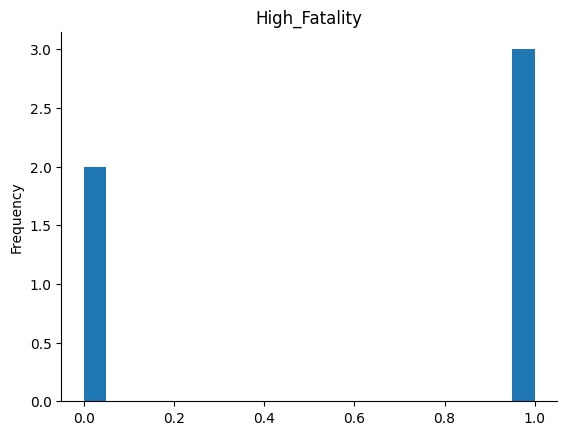

In [ ]:
from matplotlib import pyplot as plt
_df_3['High_Fatality'].plot(kind='hist', bins=20, title='High_Fatality')
plt.gca().spines[['top', 'right',]].set_visible(False)

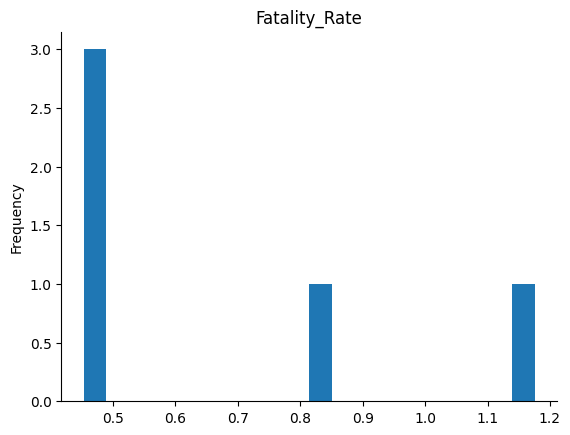

In [ ]:
from matplotlib import pyplot as plt
_df_2['Fatality_Rate'].plot(kind='hist', bins=20, title='Fatality_Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

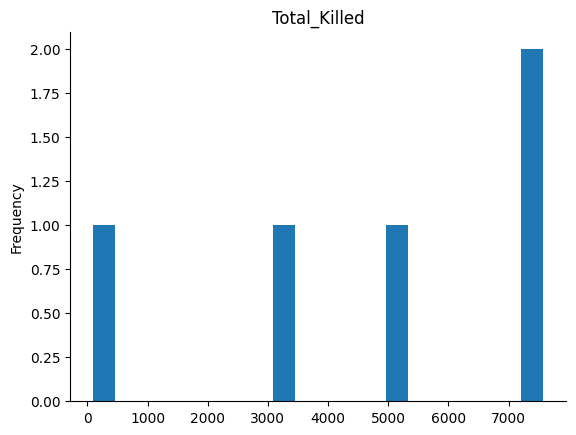

In [ ]:
from matplotlib import pyplot as plt
_df_1['Total_Killed'].plot(kind='hist', bins=20, title='Total_Killed')
plt.gca().spines[['top', 'right',]].set_visible(False)

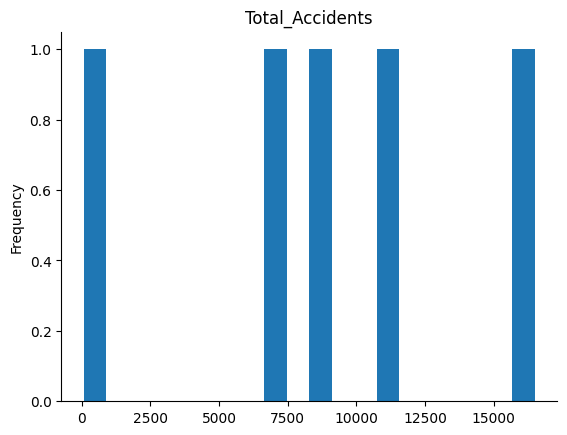

In [ ]:
from matplotlib import pyplot as plt
_df_0['Total_Accidents'].plot(kind='hist', bins=20, title='Total_Accidents')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Categorical distributions**

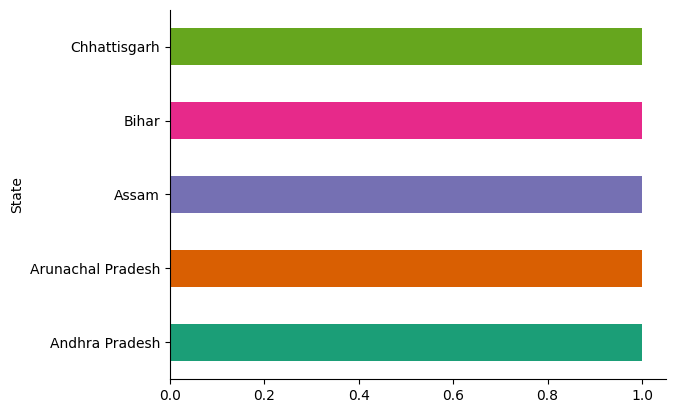

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**2-d distributions**

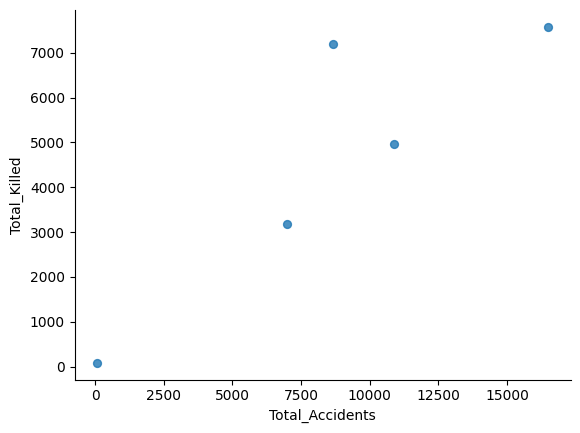

In [ ]:
from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Total_Accidents', y='Total_Killed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

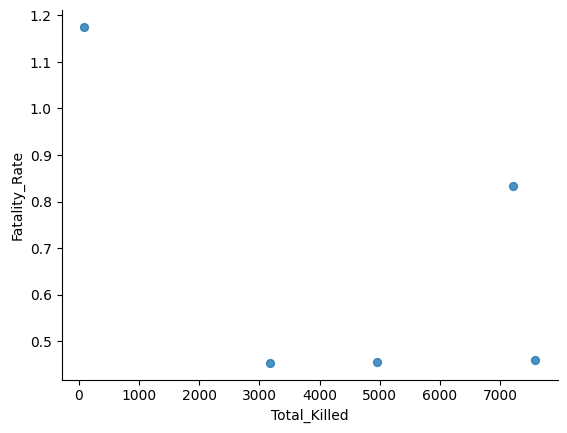

In [ ]:
from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Total_Killed', y='Fatality_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

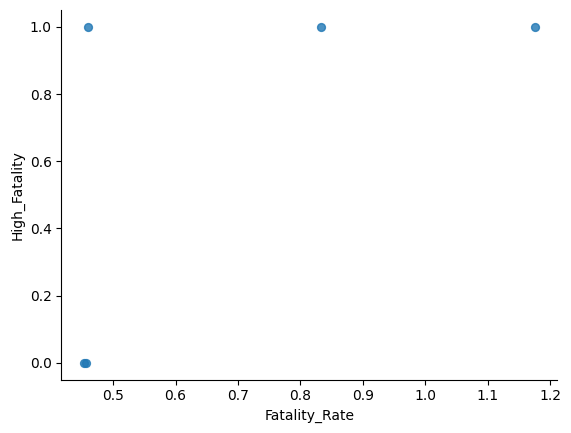

In [ ]:
from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Fatality_Rate', y='High_Fatality', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Values**

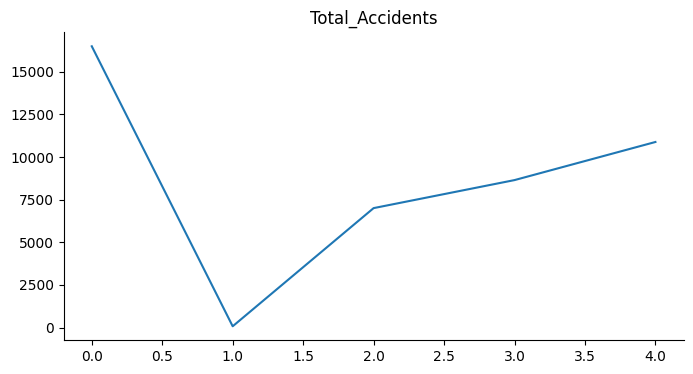

In [ ]:
from matplotlib import pyplot as plt
_df_8['Total_Accidents'].plot(kind='line', figsize=(8, 4), title='Total_Accidents')
plt.gca().spines[['top', 'right']].set_visible(False)

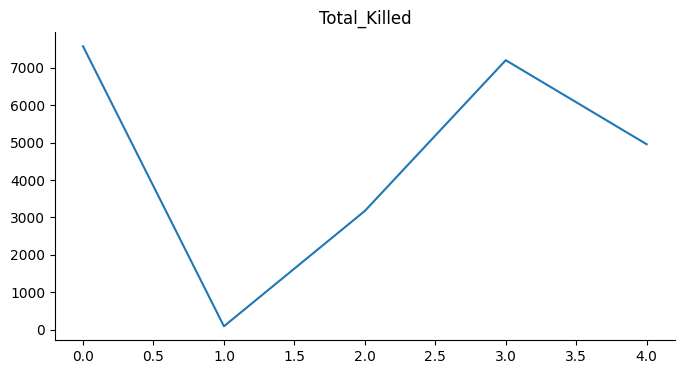

In [ ]:
from matplotlib import pyplot as plt
_df_9['Total_Killed'].plot(kind='line', figsize=(8, 4), title='Total_Killed')
plt.gca().spines[['top', 'right']].set_visible(False)

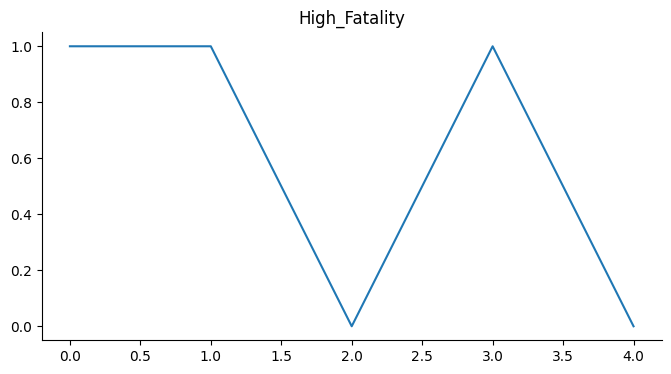

In [ ]:
from matplotlib import pyplot as plt
_df_11['High_Fatality'].plot(kind='line', figsize=(8, 4), title='High_Fatality')
plt.gca().spines[['top', 'right']].set_visible(False)

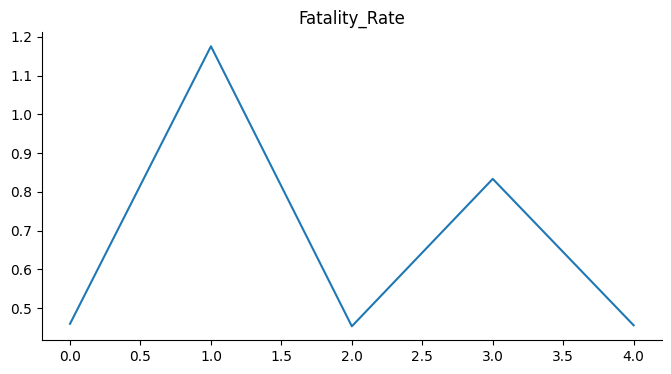

In [ ]:
from matplotlib import pyplot as plt
_df_10['Fatality_Rate'].plot(kind='line', figsize=(8, 4), title='Fatality_Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

**Faceted distributions**

**<string>:5: FutureWarning:**

<ipython-input-30-c31c84e7dcfc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_13, x='Total_Killed', y='State', inner='stick', palette='Dark2')


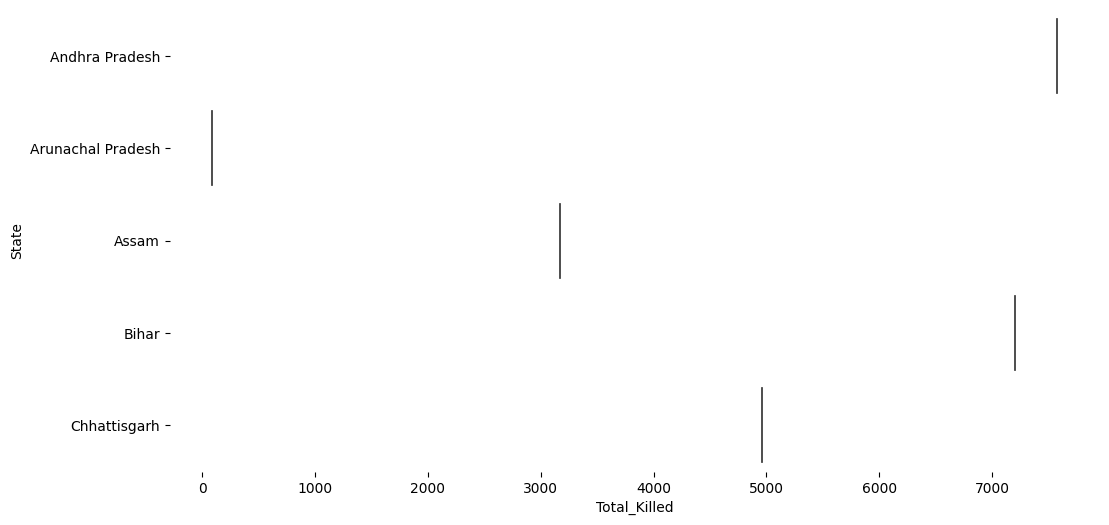

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Total_Killed', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-31-f9916b6f2a0e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_12, x='Total_Accidents', y='State', inner='stick', palette='Dark2')


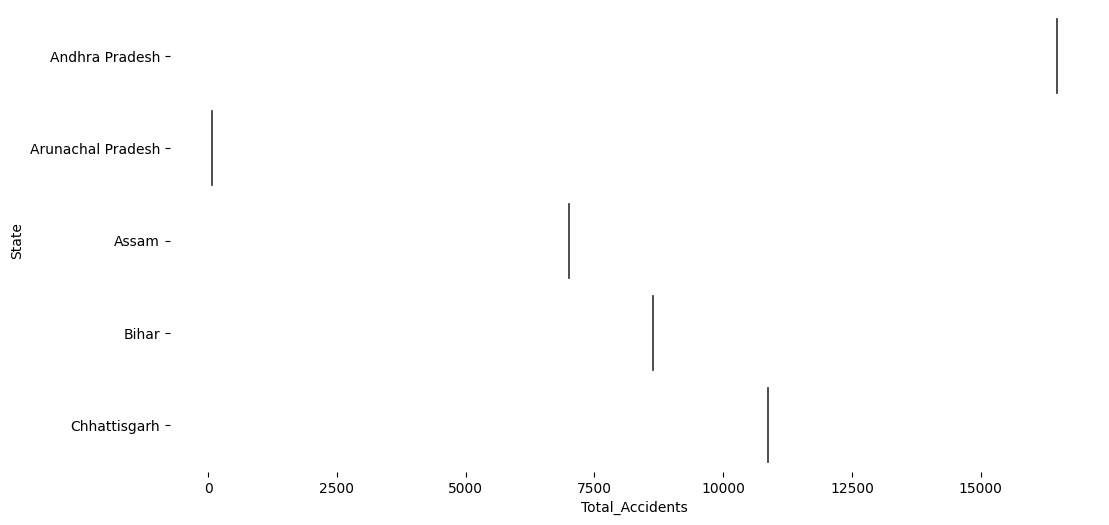

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Total_Accidents', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-32-76cb8a8224a5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_15, x='High_Fatality', y='State', inner='stick', palette='Dark2')


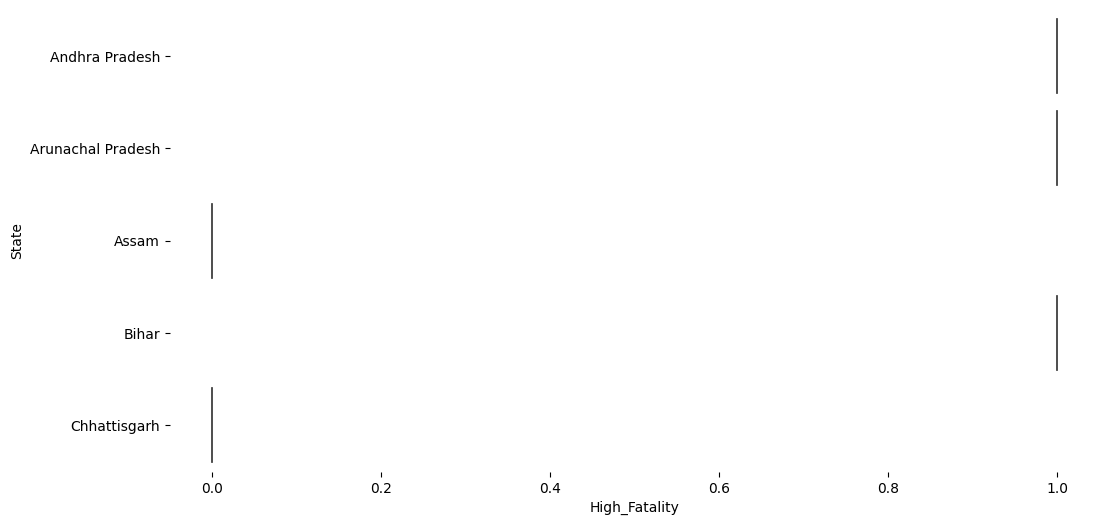

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='High_Fatality', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-33-ff8e6f83540a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_14, x='Fatality_Rate', y='State', inner='stick', palette='Dark2')


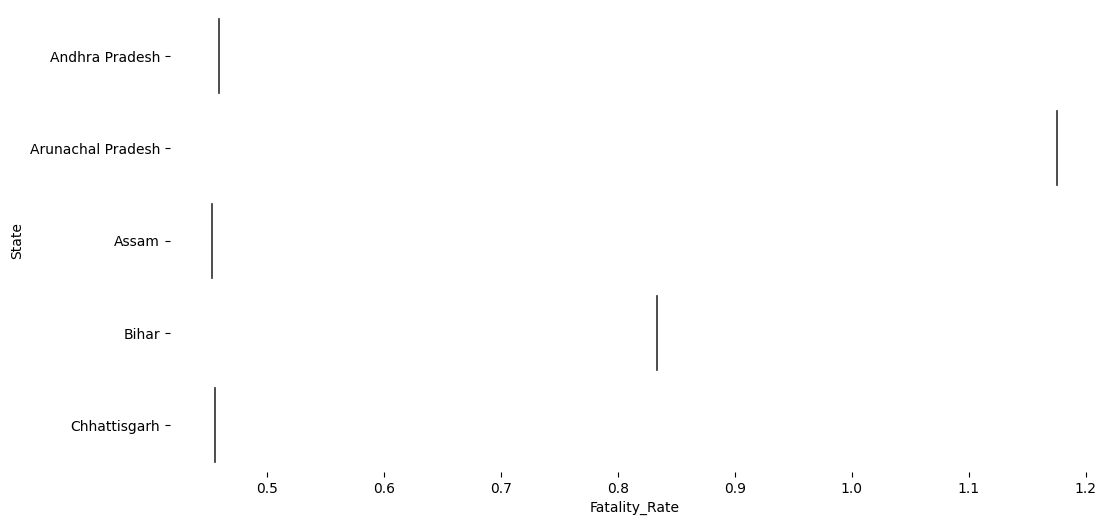

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Fatality_Rate', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**🤖 Step 4: Model Training (Precision, Accuracy)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Features and target
X = df[['Traffic_Accidents', 'Police_Accidents', 'Others_Accidents']]
y = df['High_Fatality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4166666666666667
Precision: 0.375

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.38      0.60      0.46         5

    accuracy                           0.42        12
   macro avg       0.44      0.44      0.41        12
weighted avg       0.45      0.42      0.40        12



 binary classification

**📊 Step 5: Graphical Presentation**

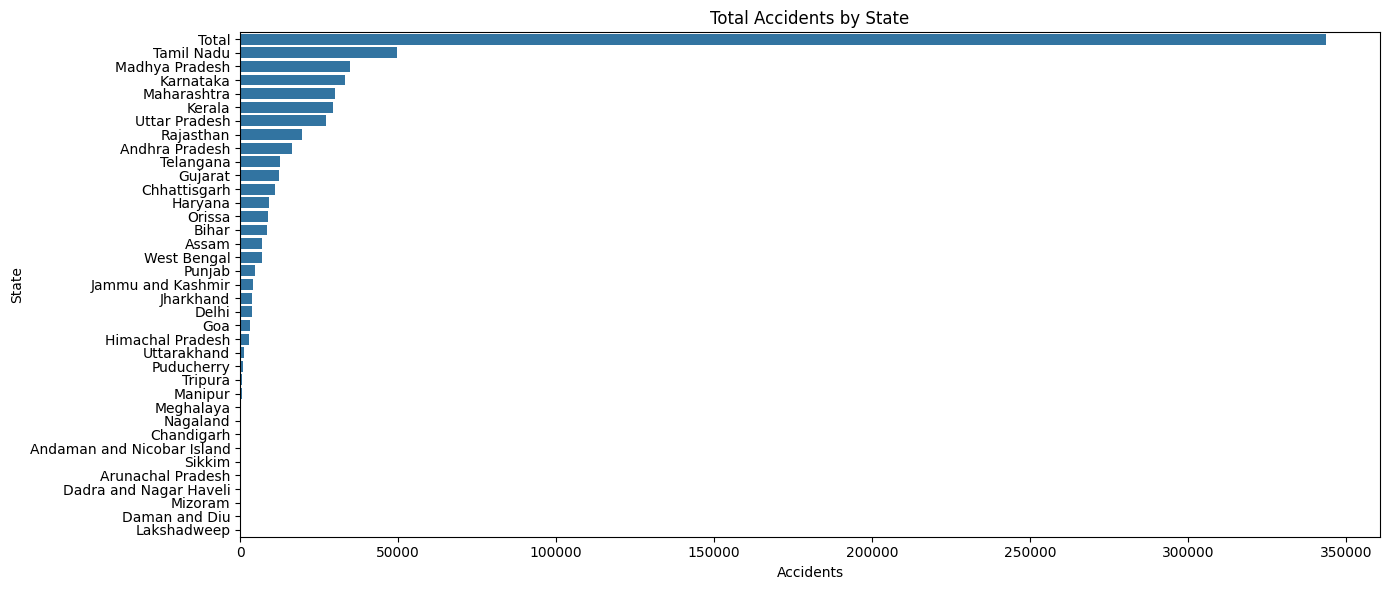

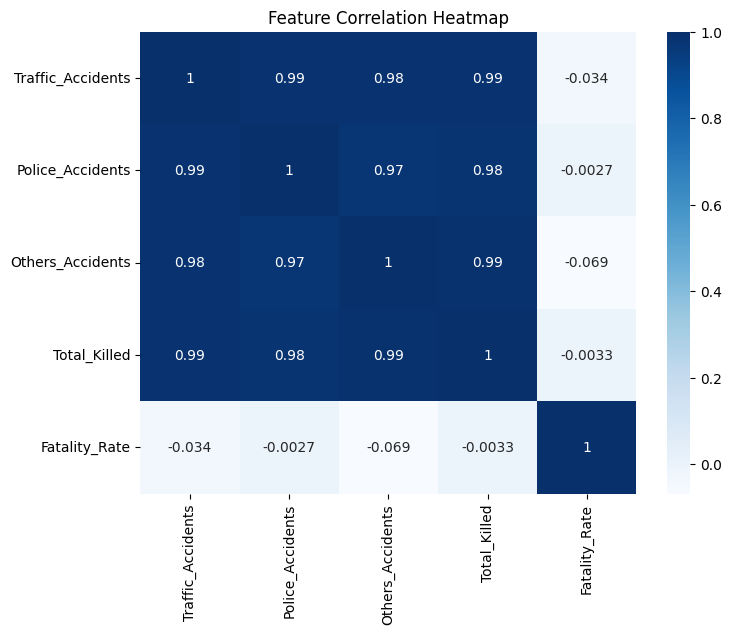

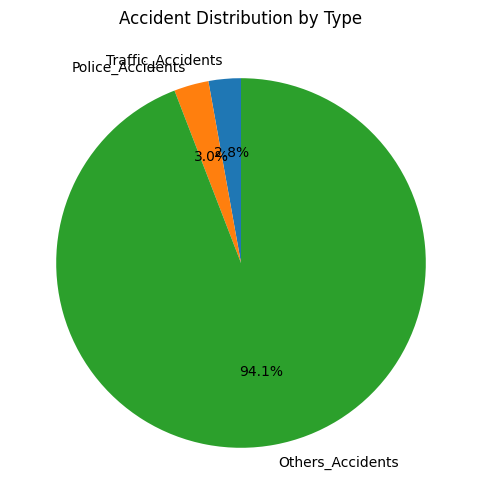

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart - Total Accidents per State
plt.figure(figsize=(14,6))
sns.barplot(y='State', x='Total_Accidents', data=df.sort_values('Total_Accidents', ascending=False))
plt.title('Total Accidents by State')
plt.xlabel('Accidents')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Traffic_Accidents', 'Police_Accidents', 'Others_Accidents', 'Total_Killed', 'Fatality_Rate']].corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pie chart - Accident type distribution
control_totals = df[['Traffic_Accidents', 'Police_Accidents', 'Others_Accidents']].sum()
control_totals.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title('Accident Distribution by Type')
plt.ylabel('')
plt.show()


In [103]:
pip install streamlit pandas plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [104]:
import streamlit as st
import pandas as pd
import plotly.express as px
import re
import os # To check if files exist

# --- Page Configuration ---
st.set_page_config(
    page_title="India Road Accidents Dashboard 2019",
    page_icon="🚗",
    layout="wide"
)

# --- Helper Function for Cleaning Column Names ---
def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        # Replace special characters and excessive spaces with underscore
        clean_col = re.sub(r'\W+', '_', col).lower()
        # Remove leading/trailing underscores
        clean_col = clean_col.strip('_')
        # Consolidate multiple underscores
        clean_col = re.sub(r'_+', '_', clean_col)
        new_cols.append(clean_col)
    df.columns = new_cols
    # Rename the first column consistently if it's state/ut related
    if 'states_uts' in df.columns[0] or 'state_ut' in df.columns[0]:
         df = df.rename(columns={df.columns[0]: 'state_uts'})
    return df

# --- Data Loading and Caching ---
@st.cache_data # Cache the data loading to speed up app
def load_data():
    data_files = {
        "a24": "RA2019_A24.csv", # Traffic Control
        "a25": "RA2019_A25.csv", # Weather
        "a26": "RA2019_A26.csv", # Vehicle Type (Good for Overall Totals)
        "a29": "RA2019_A29.csv", # Killed by Vehicle Type & Gender
        # "a29a": "RA2019_A29a.csv", # Pedestrian Killed by Vehicle Type (More specific)
        # "a29c": "RA2019_A29c.csv", # Two Wheeler Killed by Vehicle Type (More specific)
        # "a32": "RA2019_A32.csv", # Injured by Age & Gender
        "a33": "RA2019_A33.csv", # Killed by Age & Gender
        "a35": "RA2019_A35.csv"  # Cause / Driver Fault
    }
    dfs = {}
    all_files_found = True
    missing_files = []

    for key, filename in data_files.items():
        if os.path.exists(filename):
            try:
                df = pd.read_csv(filename)
                df = clean_col_names(df)
                # Remove the 'Total' row for state-wise analysis
                if 'state_uts' in df.columns:
                    df = df[df['state_uts'].str.strip().str.lower() != 'total']
                # Convert potential numeric columns, coercing errors to NaN
                for col in df.columns:
                    if df[col].dtype == 'object': # Only attempt conversion on object columns
                         try:
                            # Attempt numeric conversion only if it seems plausible
                            if df[col].str.contains(r'^\d+(\.\d+)?$', na=False).sum() > 0.5 * len(df[col].dropna()):
                                df[col] = pd.to_numeric(df[col], errors='coerce')
                         except AttributeError: # Handle cases where .str accessor fails (already numeric?)
                            pass

                dfs[key] = df
            except Exception as e:
                st.error(f"Error loading or processing {filename}: {e}")
                dfs[key] = pd.DataFrame() # Assign empty dataframe on error
        else:
            all_files_found = False
            missing_files.append(filename)
            dfs[key] = pd.DataFrame() # Assign empty dataframe if file missing


    if not all_files_found:
        st.warning(f"Missing data files: {', '.join(missing_files)}. Some charts may be unavailable.")

    return dfs

dataframes = load_data()

# --- Sidebar Filters ---
st.sidebar.header("Filters")

# Check if primary dataframe for states is loaded
if 'a26' in dataframes and not dataframes['a26'].empty and 'state_uts' in dataframes['a26'].columns:
    states_list = ["All States"] + sorted(dataframes['a26']['state_uts'].unique().tolist())
    selected_state = st.sidebar.selectbox("Select State/UT", states_list)
else:
    st.sidebar.warning("State data (A26) not loaded correctly. State filter unavailable.")
    selected_state = "All States" # Default behavior

# --- Main Dashboard ---
st.title("🇮🇳 India Road Accidents Dashboard 2019")
st.markdown("An interactive overview of road accidents in India based on 2019 data.")

# Filter data based on selection
filtered_dfs = {}
if selected_state != "All States":
    for key, df in dataframes.items():
        if 'state_uts' in df.columns and not df.empty:
            filtered_dfs[key] = df[df['state_uts'] == selected_state].copy()
        else:
            filtered_dfs[key] = pd.DataFrame() # Keep structure even if empty
else:
    filtered_dfs = dataframes # Use all data if "All States" is selected


# --- Key Metrics ---
st.header("Overall Summary" if selected_state == "All States" else f"Summary for {selected_state}")

# Use df_a26 for totals as it seems comprehensive per state
df_metrics = filtered_dfs.get('a26', pd.DataFrame())

if not df_metrics.empty:
    total_accidents_col = next((col for col in df_metrics.columns if 'total_number_of_road_accidents' in col), None)
    total_killed_col = next((col for col in df_metrics.columns if 'total_number_of_persons_killed' in col), None)
    total_injured_col = next((col for col in df_metrics.columns if 'total_number_of_persons_minor_injured' in col or 'total_injured' in col), None) # Simplified - adjust if needed

    total_accidents = df_metrics[total_accidents_col].sum() if total_accidents_col else 0
    total_killed = df_metrics[total_killed_col].sum() if total_killed_col else 0
    total_injured = df_metrics[total_injured_col].sum() if total_injured_col else 0 # Approx total injured

    col1, col2, col3 = st.columns(3)
    with col1:
        st.metric("Total Road Accidents", f"{total_accidents:,}")
    with col2:
        st.metric("Total Persons Killed", f"{total_killed:,}")
    with col3:
        st.metric("Total Persons Injured (Approx)", f"{total_injured:,}") # Note approximation
else:
    st.warning("Accident summary data (A26) not available.")


# --- State-wise Analysis (Only if "All States" is selected) ---
if selected_state == "All States":
    st.header("State-wise Comparison")
    df_a26 = dataframes.get('a26', pd.DataFrame())
    if not df_a26.empty and total_accidents_col and total_killed_col:
        # Prepare data for charts
        df_state_summary = df_a26[['state_uts', total_accidents_col, total_killed_col]].copy()
        df_state_summary = df_state_summary.rename(columns={
            total_accidents_col: 'Total Accidents',
            total_killed_col: 'Total Killed'
        })

        col1, col2 = st.columns(2)

        with col1:
            st.subheader("Top 15 States by Total Accidents")
            df_sorted_accidents = df_state_summary.sort_values('Total Accidents', ascending=False).head(15)
            fig_acc = px.bar(df_sorted_accidents,
                             x='state_uts',
                             y='Total Accidents',
                             title="Total Accidents by State/UT (Top 15)",
                             labels={'state_uts': 'State/UT'})
            fig_acc.update_layout(xaxis_title="", yaxis_title="Number of Accidents")
            st.plotly_chart(fig_acc, use_container_width=True)

        with col2:
            st.subheader("Top 15 States by Total Persons Killed")
            df_sorted_killed = df_state_summary.sort_values('Total Killed', ascending=False).head(15)
            fig_kill = px.bar(df_sorted_killed,
                              x='state_uts',
                              y='Total Killed',
                              title="Persons Killed by State/UT (Top 15)",
                              labels={'state_uts': 'State/UT'},
                              color_discrete_sequence=px.colors.qualitative.Pastel)
            fig_kill.update_layout(xaxis_title="", yaxis_title="Number Killed")
            st.plotly_chart(fig_kill, use_container_width=True)

        # Scatter plot: Accidents vs Killed
        st.subheader("Accidents vs. Fatalities")
        if len(df_state_summary) > 1: # Need multiple points for a scatter plot
            fig_scatter = px.scatter(df_state_summary,
                                     x='Total Accidents',
                                     y='Total Killed',
                                     hover_name='state_uts',
                                     title="Total Accidents vs. Total Persons Killed by State/UT",
                                     trendline="ols", # Add trendline
                                     labels={'Total Accidents': 'Number of Accidents', 'Total Killed': 'Number Killed'},
                                     hover_data={'state_uts': True, 'Total Accidents': ':,', 'Total Killed': ':,'})
            st.plotly_chart(fig_scatter, use_container_width=True)
        else:
             st.info("Select 'All States' to view the Accidents vs. Fatalities scatter plot.")

    else:
        st.warning("State comparison data (A26) not available or columns not found.")

# --- Analysis by Cause (A35) ---
st.header("Analysis by Cause of Accident")
df_a35 = filtered_dfs.get('a35', pd.DataFrame())

if not df_a35.empty:
    # Identify cause columns (simplified example - adjust based on actual cleaned names)
    cause_metrics = {
        'Over-Speeding': ('over_speeding_number_of_accidents_number', 'over_speeding_persons_killed_number'),
        'Drunken Driving': ('drunken_driving_consumption_of_alcohol_and_drug_number_of_accidents', 'drunken_driving_consumption_of_alcohol_and_drug_persons_killed'),
        'Driving on Wrong Side': ('driving_on_wrong_side_number_of_accidents', 'driving_on_wrong_side_persons_killed'),
        'Jumping Red Light': ('jumping_red_light_number_of_accidents', 'jumping_red_light_persons_killed'),
        'Use of Mobile Phone': ('use_of_mobile_phone_number_of_accidents', 'use_of_mobile_phone_persons_killed'),
        'Other Causes': ('others_number_of_accidents', 'others_persons_killed')
    }

    cause_data = []
    for cause, (acc_col, kill_col) in cause_metrics.items():
        # Check if columns exist in the dataframe
        if acc_col in df_a35.columns and kill_col in df_a35.columns:
            total_acc = df_a35[acc_col].sum()
            total_kill = df_a35[kill_col].sum()
            cause_data.append({'Cause': cause, 'Accidents': total_acc, 'Killed': total_kill})
        # else:
        #     st.warning(f"Columns for cause '{cause}' not found in A35.")

    if cause_data:
        df_cause_summary = pd.DataFrame(cause_data)

        col1, col2 = st.columns(2)
        with col1:
            st.subheader("Accidents by Major Cause")
            fig_cause_acc = px.bar(df_cause_summary.sort_values('Accidents', ascending=False),
                                   x='Cause', y='Accidents', title="Accidents by Cause",
                                   color='Cause')
            fig_cause_acc.update_layout(showlegend=False)
            st.plotly_chart(fig_cause_acc, use_container_width=True)
        with col2:
            st.subheader("Fatalities by Major Cause")
            fig_cause_kill = px.bar(df_cause_summary.sort_values('Killed', ascending=False),
                                    x='Cause', y='Killed', title="Persons Killed by Cause",
                                    color='Cause')
            fig_cause_kill.update_layout(showlegend=False)
            st.plotly_chart(fig_cause_kill, use_container_width=True)
    else:
        st.warning("Could not process cause data from A35.")

else:
    st.warning("Cause of accident data (A35) not available.")


# --- Analysis by Vehicle Type (A26) ---
st.header("Analysis by Vehicle Type Involved")
df_a26 = filtered_dfs.get('a26', pd.DataFrame())

if not df_a26.empty:
    # Simplified - Identify columns based on common vehicle types
    vehicle_metrics = {
        'Pedestrian': ('pedestrian_number_of_road_accidents', 'pedestrian_number_of_persons_killed'),
        'Bicycles': ('bicycles_number_of_road_accidents', 'bicycles_number_of_persons_killed'),
        'Two Wheelers': ('two_wheelers_number_of_road_accidents', 'two_wheelers_number_of_persons_killed'),
        'Auto Rickshaws': ('auto_rickshaws_number_of_road_accidents', 'auto_rickshaws_number_of_persons_killed'),
        'Cars/Taxis/Vans/LMV': ('cars_taxis_vans_and_lmv_number_of_road_accidents', 'cars_taxis_vans_and_lmv_number_of_persons_killed'),
        'Trucks/Lorries': ('trucks_lorries_number_of_road_accidents', 'trucks_lorries_number_of_persons_killed'),
        'Buses': ('buses_number_of_road_accidents', 'buses_number_of_persons_killed'),
        'Others': ('others_number_of_road_accidents', 'others_number_of_persons_killed')
        # Add E-rickshaw etc. if needed
    }

    vehicle_data = []
    for v_type, (acc_col, kill_col) in vehicle_metrics.items():
         if acc_col in df_a26.columns and kill_col in df_a26.columns:
             total_acc = df_a26[acc_col].sum()
             total_kill = df_a26[kill_col].sum()
             vehicle_data.append({'Vehicle Type': v_type, 'Accidents': total_acc, 'Killed': total_kill})
         # else:
         #     st.warning(f"Columns for vehicle type '{v_type}' not found in A26.")

    if vehicle_data:
        df_vehicle_summary = pd.DataFrame(vehicle_data)

        col1, col2 = st.columns(2)
        with col1:
            st.subheader("Accident Distribution by Vehicle Type")
            # Filter out zero-accident types for Pie chart
            df_pie_acc = df_vehicle_summary[df_vehicle_summary['Accidents'] > 0]
            if not df_pie_acc.empty:
                fig_veh_acc = px.pie(df_pie_acc, names='Vehicle Type', values='Accidents',
                                     title="Share of Accidents by Vehicle Type", hole=0.3)
                fig_veh_acc.update_traces(textposition='inside', textinfo='percent+label')
                st.plotly_chart(fig_veh_acc, use_container_width=True)
            else:
                st.info("No accident data to display for vehicle types.")

        with col2:
             st.subheader("Fatality Distribution by Vehicle Type")
             df_pie_kill = df_vehicle_summary[df_vehicle_summary['Killed'] > 0]
             if not df_pie_kill.empty:
                 fig_veh_kill = px.pie(df_pie_kill, names='Vehicle Type', values='Killed',
                                     title="Share of Fatalities by Vehicle Type", hole=0.3)
                 fig_veh_kill.update_traces(textposition='inside', textinfo='percent+label')
                 st.plotly_chart(fig_veh_kill, use_container_width=True)
             else:
                 st.info("No fatality data to display for vehicle types.")
    else:
        st.warning("Could not process vehicle type data from A26.")
else:
    st.warning("Vehicle type involvement data (A26) not available.")


# --- Analysis by Age Group (A33 - Killed) ---
st.header("Analysis by Age Group (Persons Killed)")
df_a33 = filtered_dfs.get('a33', pd.DataFrame())

if not df_a33.empty:
    age_groups_male = {
        '< 18': 'less_than_18_years_killed_male',
        '18-25': '18_25_years_killed_male',
        '25-35': '25_35_years_killed_male',
        '35-45': '35_45_years_killed_male',
        '45-60': '45_60_years_killed_male',
        '60+': '60_and_above_killed_male',
        'Unknown': 'age_not_known_killed_male'
    }
    age_groups_female = {
        '< 18': 'less_than_18_years_killed_female',
        '18-25': '18_25_years_killed_female',
        '25-35': '25_35_years_killed_female',
        '35-45': '35_45_years_killed_female',
        '45-60': '45_60_years_killed_female',
        '60+': '60_and_above_killed_female',
        'Unknown': 'age_not_known_killed_female'
    }

    age_data = []
    for age_group in age_groups_male.keys():
        male_col = age_groups_male[age_group]
        female_col = age_groups_female[age_group]

        if male_col in df_a33.columns and female_col in df_a33.columns:
            killed_male = df_a33[male_col].sum()
            killed_female = df_a33[female_col].sum()
            age_data.append({'Age Group': age_group, 'Gender': 'Male', 'Killed': killed_male})
            age_data.append({'Age Group': age_group, 'Gender': 'Female', 'Killed': killed_female})
        # else:
        #     st.warning(f"Columns for age group '{age_group}' not found in A33.")

    if age_data:
        df_age_summary = pd.DataFrame(age_data)
        st.subheader("Fatalities by Age Group and Gender")
        fig_age_kill = px.bar(df_age_summary, x='Age Group', y='Killed', color='Gender',
                              title="Persons Killed by Age Group and Gender",
                              barmode='group', # Group bars side-by-side
                              category_orders={"Age Group": ['< 18', '18-25', '25-35', '35-45', '45-60', '60+', 'Unknown']}) # Ensure correct order
        st.plotly_chart(fig_age_kill, use_container_width=True)
    else:
        st.warning("Could not process age group data from A33.")

else:
    st.warning("Age group data (A33) not available.")


# --- Analysis by Weather (A25) ---
st.header("Analysis by Weather Condition")
df_a25 = filtered_dfs.get('a25', pd.DataFrame())

if not df_a25.empty:
    # Identify weather columns (simplified)
    weather_metrics = {
        'Sunny/Clear': ('sunny_clear_total_accidents_number', 'sunny_clear_persons_killed_number'),
        'Rainy': ('rainy_total_accidents', 'rainy_persons_killed'),
        'Foggy/Misty': ('foggy_and_misty_total_accidents', 'foggy_and_misty_persons_killed'),
        'Hail/Sleet': ('hail_sleet_total_accidents', 'hail_sleet_persons_killed'),
        'Others': ('others_total_accidents', 'others_persons_killed')
    }

    weather_data = []
    for weather, (acc_col, kill_col) in weather_metrics.items():
        if acc_col in df_a25.columns and kill_col in df_a25.columns:
            total_acc = df_a25[acc_col].sum()
            total_kill = df_a25[kill_col].sum()
            weather_data.append({'Weather': weather, 'Accidents': total_acc, 'Killed': total_kill})
        # else:
        #      st.warning(f"Columns for weather '{weather}' not found in A25.")

    if weather_data:
        df_weather_summary = pd.DataFrame(weather_data)

        col1, col2 = st.columns(2)
        with col1:
             st.subheader("Accidents by Weather Condition")
             fig_weather_acc = px.pie(df_weather_summary[df_weather_summary['Accidents'] > 0],
                                      names='Weather', values='Accidents', title="Accident Share by Weather", hole=0.3)
             fig_weather_acc.update_traces(textposition='inside', textinfo='percent+label')
             st.plotly_chart(fig_weather_acc, use_container_width=True)
        with col2:
            st.subheader("Fatalities by Weather Condition")
            fig_weather_kill = px.pie(df_weather_summary[df_weather_summary['Killed'] > 0],
                                       names='Weather', values='Killed', title="Fatality Share by Weather", hole=0.3)
            fig_weather_kill.update_traces(textposition='inside', textinfo='percent+label')
            st.plotly_chart(fig_weather_kill, use_container_width=True)
    else:
        st.warning("Could not process weather data from A25.")
else:
    st.warning("Weather condition data (A25) not available.")


st.sidebar.markdown("---")
st.sidebar.info("Data Source: Road Accidents in India - 2019 (Ministry of Road Transport & Highways)")
st.sidebar.info("Dashboard created using Streamlit and Plotly.")

2025-04-11 04:27:59.492 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-11 04:27:59.495 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-04-11 04:27:59.499 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-04-11 04:27:59.500 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-11 04:27:59.856 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-11 04:27:59.860 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-11 04:27:59.863 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running 

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())